In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv("exoplanets.csv",low_memory=False)
T=pd.DataFrame([data["NAME"],data["TEFF"],data["MASS"],data["A"],data["DENSITY"],data["R"],data["STAR"],data["MSTAR"],data["RSTAR"],data["BINARY"]])
DF=pd.DataFrame.transpose(T)

In [3]:
DF=DF.dropna(subset=["BINARY"])
DF=DF.reset_index()      
del DF["index"]
for i in np.arange(len(DF["BINARY"])):
    if DF['BINARY'][i]==1:
        DF=DF.drop(index=i)
DF=DF.reset_index()      
del DF["index"]

M_JT=317.816  #Relacion de masa: MasaJupyter/masaTierra
R_J=71492 # radio de Jupyter en km 
R_T=6371 # radio de la tierra en km
R_JT=R_J/R_T
DF["MASSE"]=M_JT*DF["MASS"]
DF["RE"]=R_JT*DF["R"]

In [4]:
# calculo de la luminosidad del sol y luminusidad de las estrellas en unidades solares.
T_s=5780 #temperatura efectiva del sol en Kelvin
R_sol=6.957*10**(8) # radio del sol en metros
sigma=5.6703*10**(-8) #constante de Stefan-Boltzman en  J/K
L_sol=4*np.pi*(R_sol)**2 * sigma*T_s**4  #luminosidad del sol en Vatios (W), tomaremos esto como referencia para las demas estrellas
DF["LUM"]=(4*np.pi*(DF["RSTAR"]*R_sol)**2 *sigma*DF["TEFF"]**4)/L_sol #Luminusidad en unidades solares

In [5]:
r_is=0.72
r_os=1.77
a_i= 2.7619*10**(-5.)
b_i=3.8095*10**(-9.)
a_o=1.3786*10**(-4)
b_o=1.4286*10**(-9.)

DF["r_i"] = ( r_is-a_i*(DF["TEFF"]-T_s)-b_i*(DF["TEFF"]-T_s)**2 )*(DF["LUM"])**(0.5)
DF["r_o"] = ( r_os-a_o*(DF["TEFF"]-T_s)-b_o*(DF["TEFF"]-T_s)**2 )*(DF["LUM"])**(0.5)

DF=DF.dropna(subset=["r_i"])
DF=DF.reset_index()      
del DF["index"]

In [6]:
# Filtro Densidad
DF=DF.dropna(subset=["DENSITY"])
DF=DF.reset_index()      
del DF["index"]
for i in np.arange(len(DF["DENSITY"])):
    if DF['DENSITY'][i] <= 4 or  DF['DENSITY'][i] >= 40:
        DF=DF.drop(index=i)
DF=DF.reset_index()
del DF["index"]
DF["HZD"]=(2.*DF["A"]-DF["r_o"]-DF["r_i"])/(DF["r_o"]-DF["r_i"])

In [7]:
#Filtro zona de habitaabilidad
for i in np.arange(len(DF["HZD"])):
    if DF['HZD'][i]<=-1 or  DF['HZD'][i]>=1:
        DF=DF.drop(index=i)
DF=DF.reset_index()
del DF["index"]
DF

,NAME,TEFF,MASS,A,DENSITY,R,STAR,MSTAR,RSTAR,BINARY,MASSE,RE,LUM,r_i,r_o,HZD
0,K2-18 b,3457,0.025337,0.142931,7.87,0.216574,K2-18,0.359,0.411,0,8.0525,2.43028,0.0216157,0.112267,0.306181,-0.683735
1,Kepler-22 b,5518,0.0183345,0.848513,12.8929,0.2125,Kepler-22,0.97,0.979,0,5.827,2.38456,0.796124,0.648649,1.61144,-0.584822
2,LHS 1140 b,3131,0.0212289,0.0874937,12.5,0.131011,LHS 1140,0.146,0.186,0,6.74688,1.47014,0.00297884,0.0418308,0.115989,0.231502


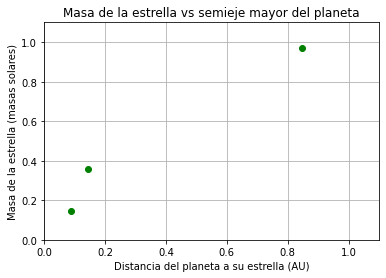

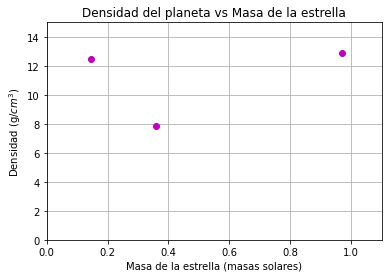

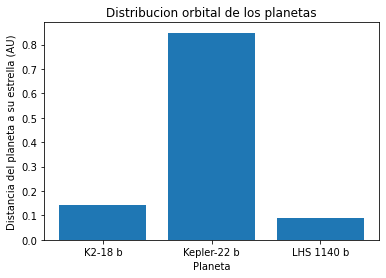

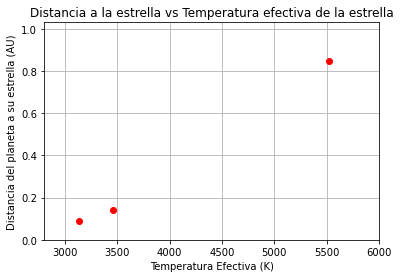

In [69]:
#Graficas

plt.plot(DF["A"],DF["MSTAR"],"o",color="g")
plt.title("Masa de la estrella vs semieje mayor del planeta")
plt.xlim(0,1.1)
plt.ylim(0,1.1)
plt.xlabel("Distancia del planeta a su estrella (AU)") #semieje mayor
plt.ylabel("Masa de la estrella (masas solares)")
plt.grid()
plt.show()

plt.figure(2)
plt.plot(DF["MSTAR"],DF["DENSITY"],"o",color="m")
plt.title("Densidad del planeta vs Masa de la estrella")
plt.xlim(0,1.1)
plt.ylim(0,15)
plt.ylabel("Densidad (g/$cm^{3}$)") 
plt.xlabel("Masa de la estrella (masas solares)")
plt.grid()
plt.show()

plt.figure(3)
plt.bar(DF["NAME"],DF["A"])
plt.title("Distribucion orbital de los planetas")
plt.xlabel("Planeta")
plt.ylabel("Distancia del planeta a su estrella (AU)")
plt.show()

plt.figure(4)
plt.plot(DF["TEFF"],DF["A"],"o",color="r")
plt.title("Distancia a la estrella vs Temperatura efectiva de la estrella")
plt.xlabel("Temperatura Efectiva (K)")
plt.ylabel("Distancia del planeta a su estrella (AU)")
plt.grid()
plt.xlim(2800,6000)
plt.ylim(0,1.03)
plt.show()